In [52]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# What's on my plate?

As remainder, our initial research questions are:

- What is the proportion of imported/exported products per country?
- Which countries sell the highest variety of eco-friendly products in terms of packaging and CO2 footprint?
- Which countries have the largest variety of organic-labeled products?
- What is the average nutrition score of every product category?
- What ingredients imply a better nutrition score (or vice-versa)?

From those in mind, we will analyse the dataset in order to see which features would be usefull to answer them and and most of all find if there is enough data to answer them!

# Data cleaning

### Loading the CSV file
The CSV File is stored on our computer with the name `OpenFood.csv`. From opening it with a text editor, we found out that the cells are separated by tabulations (i.e. by the `\t` character). Eventhough the file size is 1.8 GB, we still manage to fit it in a dataframe. So let's open it:

In [2]:
path = ""
file_name = "OpenFood.csv"
data_path = path+file_name
df = pd.read_csv(data_path, sep = '\t')

/Users/Mathias/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3,5,24,25,26,28,36,41,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### DataFrame Exploration

Let's first make sure we can display all the columns of the DataFrame:

In [3]:
pd.set_option("display.max_columns", 200)

In [4]:
pd.set_option("display.max_rows", 200)

Let's take a first look into it!

In [5]:
df

code  \
0                      0000000000017   
1                      0000000000031   
2                      0000000000123   
3                      0000000000291   
4                      0000000000949   
5                      0000000000970   
6                      0000000001001   
7                      0000000001007   
8                      0000000001137   
9                      0000000001151   
10                     0000000001199   
11                     0000000001281   
12                     0000000001311   
13                     0000000001328   
14                     0000000001564   
15                     0000000001663   
16                     0000000001670   
17                     0000000001885   
18                     0000000002042   
19                     0000000002103   
20                     0000000002219   
21                     0000000002257   
22                     0000000002264   
23                     0000000002363   
24                     0000000002400   
25                     0000000002417   
26                     0000000003018   
27                     0000000003087   
28                     0000000003384   
29                     0000000003780   
30                     0000000003803   
31                     0000000003827   
32                     0000000004299   
33                     0000000004510   
34                     0000000004530   
35                     0000000004559   
36                     0000000004565   
37                     0000000004572   
38                     0000000004732   
39                     0000000004794   
40                     0000000005005   
41                     0000000005081   
42                     0000000005166   
43                     0000000005241   
44                     0000000005272   
45                     0000000005388   
46                     0000000005470   
47                     0000000005500   
48                     0000000005661   
49                     0000000007009   
50                     0000000007160   
51                     0000000008204   
52                     0000000009317   
53                     0000000010900   
54                     0000000011631   
55                     0000000011686   
56                     0000000012812   
57                     0000000014120   
58                     0000000014250   
59                     0000000014281   
60                     0000000014595   
61                     0000000015707   
62                     0000000016087   
63                     0000000016094   
64                     0000000016100   
65                     0000000016117   
66                     0000000016124   
67                     0000000016193   
68                     0000000016513   
69                     0000000016612   
70                     0000000016650   
71                     0000000016872   
72                     0000000016933   
73                     0000000017497   
74                      000000001772   
75                     0000000018012   
76                     0000000018050   
77                     0000000018173   
78                     0000000018197   
79                     0000000018227   
80                     0000000018265   
81                     0000000018289   
82                     0000000018319   
83                     0000000018340   
84                     0000000018357   
85                     0000000018371   
86                     0000000018388   
87                     0000000018395   
88                     0000000018401   
89                     0000000018418   
90                     0000000018449   
91                     0000000018456   
92                     0000000018500   
93                     0000000018517   
94                     0000000018524   
95                     0000000018555   
96                     0000000018562   
97                     0000000018579   
98                     0000000018630   
99                     000000001

With this first look at the DataFrame we can immediately remove the following columns as they are useless for our questions:

In [6]:
columns_to_drop = [
    'url',
    'creator',
    'created_t',
    'created_datetime',
    'last_modified_t',
    'last_modified_datetime',
    'generic_name',
    'quantity',
    'emb_codes',
    'emb_codes_tags',
    'purchase_places',
    'stores',
    'traces',
    'traces_tags',
    'serving_size',
    'no_nutriments',
    'image_url',
    'allergens', 
    'image_small_url',
    'manufacturing_places_tags',
    'image_ingredients_url',
    'image_ingredients_small_url',
    'image_nutrition_url',
    'image_nutrition_small_url',
    'states',        
    'states_en',
    'states_tags',
    'serving_quantity',
    'traces_en',
    'allergens_en',
    'ingredients_that_may_be_from_palm_oil',
    'ingredients_from_palm_oil'
]

In [7]:
df2 = df.drop(columns_to_drop, axis=1)

It is hard to get an idea of what the values are as there are loads of NaN Values... To get a better idea of the values from the dataframe, we show the unique values of each columns:

In [8]:
# Takes couple minutes to run
df_unique = pd.DataFrame()
for col in df2.columns:
    df_unique = pd.concat([df_unique, pd.Series(df2[col].unique())], ignore_index=True, axis=1,copy=False)
df_unique.columns= df2.columns

code
product_name
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
labels
labels_tags
labels_en
first_packaging_code_geo
cities
cities_tags
countries
countries_tags
countries_en
ingredients_text
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
main_category
main_category_en
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
-butyric-acid_100g
-caproic-acid_100g
-caprylic-acid_100g
-capric-acid_100g
-lauric-acid_100g
-myristic-acid_100g
-palmitic-acid_100g
-stearic-acid_100g
-arachidic-acid_100g
-behenic-acid_100g
-lignoceric-acid_100g
-cerotic-acid_100g
-montanic-acid_100g
-melissic-acid_100g
monounsaturated-fat_100g
polyunsaturated-fat_100g
omega-3-fat_100g
-alpha-linolenic-acid_100g
-eicosape

In [9]:
df_unique.head(100)

code                                  product_name  \
0   0000000000017                              Vitória crackers   
1   0000000000031                                         Cacao   
2   0000000000123                         Sauce Sweety chili 0%   
3   0000000000291                                     Mendiants   
4   0000000000949                     Salade de carottes râpées   
5   0000000000970                   Fromage blanc aux myrtilles   
6   0000000001001                                           NaN   
7   0000000001007                                      Vainilla   
8   0000000001137                             Baguette parisien   
9   0000000001151                 &quot;Baguette Lyonnais&quot;   
10  0000000001199                        Solène céréales poulet   
11  0000000001281                            Tarte noix de coco   
12  0000000001311                    Salade de fruits exotiques   
13  0000000001328                              Chouquettes x 30   
14  0000000001564                           Fromage blanc pêche   
15  0000000001663                        Crème dessert chocolat   
16  0000000001670                          Bouillie de sarrasin   
17  0000000001885                              Compote de poire   
18  0000000002042                              Paëlla de poulet   
19  0000000002103                        Aiguillettes de poulet   
20  0000000002219                            Salade shaker chef   
21  0000000002257                Salade de macedoine de légumes   
22  0000000002264                             Baguette Poitevin   
23  0000000002363                                  Suedois thon   
24  0000000002400                               Ciabatta Bombay   
25  0000000002417                                 Ciabatta Roma   
26  0000000003018                                 Salade tomate   
27  0000000003087                            Farine de blé noir   
28  0000000003384                       Mousse chocolat douceur   
29  0000000003780                             Coca des flandres   
30  0000000003803                              Brochettes dinde   
31  0000000003827                                Suedois saumon   
32  0000000004299                               Crêpes au Kamok   
33  0000000004510                         Salade shaker taboulé   
34  0000000004530                Banana Chips Sweetened (Whole)   
35  0000000004559                                       Peanuts   
36  0000000004565                    Sandwich classique fromage   
37  0000000004572                                 Pain epeautre   
38  0000000004732             Sandiwch Tradition Complet Jambon   
39  0000000004794            Fromage blanc à la creme de marron   
40  0000000005005                                     Abondance   
41  0000000005081                                  Salade verte   
42  0000000005166         cuisse de poulet direct au four curry   
43  0000000005241                                         Bagel   
44  0000000005272             Sandwich solene céréales sicilien   
45  0000000005388                         Brioché poulet caesar   
46  0000000005470                              BAguette bressan   
47  0000000005500                               Baguette Niçois   
48  0000000005661              Pavé de saumon fumé à la ficelle   
49  0000000007009                          Torti au saumon fumé   
50  0000000007160                                   CORNED BEEF   
51  0000000008204                     Mediterranean Pasta Salad   
52  0000000009317                    Salade fusili poulet curry   
53  0000000010900                           Pasta box carbonara   
54  0000000011631                  Pasta box jambon champignion   
55  0000000011686                                Tarte chocolat   
56  0000000012812                   Salade fraîcheur 3 fromages   
57  0000000014120                       Salade fraicheur caesar   
58  0000000014250                               salade ibéri

As we saw that there are loads of NaN values we also show the number of non NaN values of each columns. We further show the number of different values in each columns and how many different values there are:

In [10]:
cols = ['Number of non NaN values per column', 'Number of different values in each columns']

describe_df = pd.DataFrame([df2.count(),df_unique.count()]).transpose()
describe_df.columns= cols
describe_df['ColNumber'] = np.arange(df_unique.shape[1])
describe_df

Number of non NaN values per column  \
code                                                                     683250   
product_name                                                             656644   
packaging                                                                137520   
packaging_tags                                                           137517   
brands                                                                   460708   
brands_tags                                                              460675   
categories                                                               174424   
categories_tags                                                          174423   
categories_en                                                            174389   
origins                                                                   40923   
origins_tags                                                              40870   
manufacturing_places                                                      65541   
labels                                                                   100844   
labels_tags                                                              100875   
labels_en                                                                100875   
first_packaging_code_geo                                                  27608   
cities                                                                        0   
cities_tags                                                               29423   
countries                                                                682735   
countries_tags                                                           682735   
countries_en                                                             682735   
ingredients_text                                                         390954   
additives_n                                                              390920   
additives                                                                390907   
additives_tags                                                           210242   
additives_en                                                             210209   
ingredients_from_palm_oil_n                                              390920   
ingredients_from_palm_oil_tags                                            11884   
ingredients_that_may_be_from_palm_oil_n                                  390920   
ingredients_that_may_be_from_palm_oil_tags                                22630   
nutrition_grade_uk                                                            0   
nutrition_grade_fr                                                       137073   
pnns_groups_1                                                            252185   
pnns_groups_2                                                            258057   
main_category                                                            174320   
main_category_en                                                         174320   
energy_100g                                                              583820   
energy-from-fat_100g                                                        911   
fat_100g                                                                 578335   
saturated-fat_100g                                                       552563   
-butyric-acid_100g                                                            1   
-caproic-acid_100g                                                            1   
-caprylic-acid_100g                                                           2   
-capric-acid_100g                                                             3   
-lauric-acid_100g                                                             7   
-myristic-acid_100g                                                           2   
-palmitic-acid_100g                                                           2   
-stearic-acid_100g                                          

After further looking into the dataset, we see that there are somme columns that are redundant like for example `pakaging` and `packaging_tags` so we keep only one of the two. For this specific example we only keep the `pakaging_tags` column as the values are easier to deal with. We also remove some other columns. The reasons are stated as comment in the cell below:

In [11]:
columns_to_drop_2 = [
    'packaging',
    'brands',
    'categories',
    'categories_en',
    'origins',
    'manufacturing_places', # Would be interesting but to precise to be used...
    'labels',
    'labels_en',
    'first_packaging_code_geo', # Seems infact not really intressting
    'cities', # Contains only NaN values and not really intresting for our research questions
    'cities_tags',
    'countries', # Seem to contain useless duplicated values (France, en:FR, en:france,...)
    'countries_en',
    'ingredients_text', # to hard to deal with and not really intresting after seeing the values
    'additives',
    'additives_en',
    'ingredients_that_may_be_from_palm_oil_n', # As we already keep ingredients_from_palm_oil_n
    'ingredients_that_may_be_from_palm_oil_tags',
    'nutrition_grade_uk', # Contains only NaN values
    'main_category_en',
]

Now for the nutrition facts we can delete all the columns that have less that 1000 values (count) because if they do, it means that the columns are to specific (like type of sugar) or there aren't enough values in the dataset in the columns to be interessting. Note this means we have to drop the idea of analizing the carbon footprint as there aren't enough values to answer our carbon foot print analysis

In [12]:
# Ceating the list of all the all the food fact column to delete
describe_df_aux = describe_df.iloc[36:]
food_facts_to_drop = list(describe_df_aux[describe_df_aux['Number of non NaN values per column'] < 1000].index.values)

Now that we have the two lists we can merge them and then drop the columns:

In [13]:
# Merging the two list created above
columns_to_drop_merged = columns_to_drop_2 + food_facts_to_drop
# Deleting an storing in a new dataframe
df3 = df2.drop(columns_to_drop_merged, axis = 1)
df3

code  \
0                      0000000000017   
1                      0000000000031   
2                      0000000000123   
3                      0000000000291   
4                      0000000000949   
5                      0000000000970   
6                      0000000001001   
7                      0000000001007   
8                      0000000001137   
9                      0000000001151   
10                     0000000001199   
11                     0000000001281   
12                     0000000001311   
13                     0000000001328   
14                     0000000001564   
15                     0000000001663   
16                     0000000001670   
17                     0000000001885   
18                     0000000002042   
19                     0000000002103   
20                     0000000002219   
21                     0000000002257   
22                     0000000002264   
23                     0000000002363   
24                     0000000002400   
25                     0000000002417   
26                     0000000003018   
27                     0000000003087   
28                     0000000003384   
29                     0000000003780   
30                     0000000003803   
31                     0000000003827   
32                     0000000004299   
33                     0000000004510   
34                     0000000004530   
35                     0000000004559   
36                     0000000004565   
37                     0000000004572   
38                     0000000004732   
39                     0000000004794   
40                     0000000005005   
41                     0000000005081   
42                     0000000005166   
43                     0000000005241   
44                     0000000005272   
45                     0000000005388   
46                     0000000005470   
47                     0000000005500   
48                     0000000005661   
49                     0000000007009   
50                     0000000007160   
51                     0000000008204   
52                     0000000009317   
53                     0000000010900   
54                     0000000011631   
55                     0000000011686   
56                     0000000012812   
57                     0000000014120   
58                     0000000014250   
59                     0000000014281   
60                     0000000014595   
61                     0000000015707   
62                     0000000016087   
63                     0000000016094   
64                     0000000016100   
65                     0000000016117   
66                     0000000016124   
67                     0000000016193   
68                     0000000016513   
69                     0000000016612   
70                     0000000016650   
71                     0000000016872   
72                     0000000016933   
73                     0000000017497   
74                      000000001772   
75                     0000000018012   
76                     0000000018050   
77                     0000000018173   
78                     0000000018197   
79                     0000000018227   
80                     0000000018265   
81                     0000000018289   
82                     0000000018319   
83                     0000000018340   
84                     0000000018357   
85                     0000000018371   
86                     0000000018388   
87                     0000000018395   
88                     0000000018401   
89                     0000000018418   
90                     0000000018449   
91                     0000000018456   
92                     0000000018500   
93                     0000000018517   
94                     0000000018524   
95                     0000000018555   
96                     0000000018562   
97                     0000000018579   
98                     0000000018630   
99                     000000001

Now we can wonder if the `code` column can be set as the index:

In [14]:
df3.code.is_unique

False

So the code column is not unique let's see how may values are duplicated:

In [15]:
duplicate_codes_indices = np.where(df3.duplicated('code', keep=False).values)[0]
dups = df3.iloc[duplicate_codes_indices].copy()
dups.code = dups.code.astype(float)
dups.sort_values(by = 'code', inplace = True)
dups

322


code                                       product_name  \
207855  1.160220e+05                       British Giant Marrowfat Peas   
10832   1.160220e+05  British marrowfat processed peas in water - su...   
74720   6.356460e+05                                M&S Vegetable Pizza   
147293  6.356460e+05                Chargrilled Vegetable & Basil Pesto   
74722   6.356840e+05                                 6 Wholemeal Pittas   
147299  6.356840e+05  Wholemeal Pittas Enriched with Extra Virgin Ol...   
89032   7.228100e+05     Sea Salt & balsamic Vinegar Hand Cooked crisps   
163560  7.228100e+05     Sea Salt & Balsamic Vinegar hand cooked Crisps   
111770  8.379960e+05    Vegetable pasta bake with broccoli & petit pois   
186524  8.379960e+05    Vegetable Pasta Bake with Broccoli & Petit Pois   
203515  8.887070e+05                                  Christmas Pudding   
116859  8.887070e+05                                  Christmas Pudding   
206086  8.984780e+05                            Sandwich Œuf et Cresson   
117418  8.984780e+05                    Œuf et Cresson sur Pain Spécial   
357256  3.318233e+06                               Bicarbonate de soude   
140237  3.318233e+06                               Bicarbonate de soude   
510594  4.159932e+06                            French's Dijon mustard    
141140  4.159932e+06                 Dijon Mustard Made With Chardonnay   
144862  6.136567e+06                                                NaN   
576411  6.136567e+06                            Nescafe Gold Blend 100g   
207518  1.111082e+10                        Italian style bread crumbs    
4272    1.111082e+10                                       Bread Crumbs   
208756  1.356200e+10               Cheddar Bunnies Baked Snack Crackers   
12091   1.356200e+10                     Cheddar Bunnies Snack Crackers   
12092   1.356200e+10              Baked Snack Crackers, Cheddar Squares   
208757  1.356200e+10                           Cheddar Squares Crackers   
12480   1.410007e+10                            Milano Double Chocolate   
208942  1.410007e+10                                          Palm oil    
12527   1.410010e+10   Soft Baked Chocolate Chunk Dark Chocolat Brownie   
208943  1.410010e+10  Soft Baked Chocolate Chunk Dark Chocolate Brow...   
14443   1.600019e+10                                     Fruit Roll Ups   
209498  1.600019e+10                                     Fruit roll-ups   
209499  1.600044e+10                                                NaN   
14537   1.600044e+10                            nature valley trial mix   
209619  1.630017e+10                      Juice Blend, Orange Pineapple   
14988   1.630017e+10                       Orange Pineapple Juice Blend   
209861  1.740014e+10          Minute, Ready To Serve! Brown & Wild Rice   
15572   1.740014e+10                                  Brown & Wild Rice   
210151  1.889400e+10                            Raisins, Nut & Seed Mix   
16248   1.889400e+10                     Raisins, Nut & Seed Mix Snacks   
18640   2.100002e+10             Macaroni & Cheese Dinner Triple Cheese   
228042  2.100002e+10                                                NaN   
232456  2.219801e+10                              Sparkling Apple Juice   
21677   2.219801e+10                           Mayer Bros, Juice, Apple   
32117   3.377610e+10                            Coconut & Peanut Spread   
375756  3.377610e+10                            Coconut & Peanut Spread   
381934  3.400011e+10                                     Reese's Pieces   
32396   3.400011e+10             Reese's Pieces Au Beurre De Cacahuètes   
400514  3.485603e+10                       Welch's Island Fruits Snacks   
33070   3.485603e+10                       Welch's Island Fruits Snacks   
33384   3.549301e+10                            Applewood Smoked Salmon   
411070  3.549301e+10  High Liner, Sea Cuisine, Salmon, Applewood Smoked   
411071  3.549301e+10         High Liner, 

As it can be seen there are two types of duplicates:
Some codes appear twice and the some code are NaN. As it can be observed when codes are duplicated, they are often the same product and sometimes one of the rows contains more information than the other for the same code. So we could just keep the rows that contain the most information. And for the rows with NaN as code, the values of the columns are not matching the column names so there must be a shift of values. As a lot of values are missing, it would be complex to recover the true data and there are only 34 rows with code equal to NaN, so we can delete them:

In [16]:
dups = dups[dups != float('nan')]

dups['nb_of_features'] = np.sum(dups.notnull(), axis=1)
dups.reset_index(inplace = True)
indices_to_remove = dups.sort_values(['code','nb_of_features'],ascending = True)\
                        .groupby('code',as_index=False).first()['index'].values
df3.dropna(subset=['code'],inplace=True)
df3.drop(indices_to_remove,inplace = True)

So we verify that the `code` column of the dataframe is unique:

In [17]:
df3.code.is_unique

True

So we just have to set this column as the index:

In [18]:
df3.set_index('code', inplace = True)

We further remark that the `nutrition-score-fr_100g` and `nutrition-score-uk_100g` columns are at the end of the dataframe. So we'll just do a reordering to put them next to the `nutrition_grade_fr` for convenience:

In [44]:
# Creating the ordered index list
l1 = list(range(12))
l2 = [54,55]
l3 = list(range(12,54))
ordered_col_indices = l1+l2+l3
len(ordered_col_indices)
df3 = df3[df3.columns[ordered_col_indices]]

So that's the dataframe we end up with after removing the features and lines we don't need for our questions:

In [45]:
df3

product_name  \
code                                                                              
0000000000017                                                  Vitória crackers   
0000000000031                                                             Cacao   
0000000000123                                             Sauce Sweety chili 0%   
0000000000291                                                         Mendiants   
0000000000949                                         Salade de carottes râpées   
0000000000970                                       Fromage blanc aux myrtilles   
0000000001001                                                               NaN   
0000000001007                                                          Vainilla   
0000000001137                                                 Baguette parisien   
0000000001151                                     &quot;Baguette Lyonnais&quot;   
0000000001199                                            Solène céréales poulet   
0000000001281                                                Tarte noix de coco   
0000000001311                                        Salade de fruits exotiques   
0000000001328                                                  Chouquettes x 30   
0000000001564                                               Fromage blanc pêche   
0000000001663                                            Crème dessert chocolat   
0000000001670                                              Bouillie de sarrasin   
0000000001885                                                  Compote de poire   
0000000002042                                                  Paëlla de poulet   
0000000002103                                            Aiguillettes de poulet   
0000000002219                                                Salade shaker chef   
0000000002257                                    Salade de macedoine de légumes   
0000000002264                                                 Baguette Poitevin   
0000000002363                                                      Suedois thon   
0000000002400                                                   Ciabatta Bombay   
0000000002417                                                     Ciabatta Roma   
0000000003018                                                     Salade tomate   
0000000003087                                                Farine de blé noir   
0000000003384                                           Mousse chocolat douceur   
0000000003780                                                 Coca des flandres   
0000000003803                                                  Brochettes dinde   
0000000003827                                                    Suedois saumon   
0000000004299                                                   Crêpes au Kamok   
0000000004510                                             Salade shaker taboulé   
0000000004530                                    Banana Chips Sweetened (Whole)   
0000000004559                                                           Peanuts   
0000000004565                                        Sandwich classique fromage   
0000000004572                                                     Pain epeautre   
0000000004732                                 Sandiwch Tradition Complet Jambon   
0000000004794                                Fromage blanc à la creme de marron   
0000000005005                                                         Abondance   
0000000005081                                                      Salade verte   
0000000005166                             cuisse de poulet direct au four curry   
0000000005241                                                             Bagel   
0000000005272                                 Sandwich solene céréales sicilien   
0000000005388                                             Brioché poulet caesar   
0000000005470                                                  BAguette bressan   


And the dataframe has the following shape:

In [46]:
print('{0}(row) x {1}(columns)'.format(df3.shape[0], df3.shape[1]))

683106(row) x 56(columns)


So we are using these proportions of the initial dataframe:

In [47]:
print('{0:1.2f}% of the rows of the initial dataframe'.format(df3.shape[0]/df.shape[0]*100))
print('{0:1.2f}% of the rows of the initial dataframe'.format(df3.shape[1]/df.shape[1]*100))

99.97% of the rows of the initial dataframe
32.37% of the rows of the initial dataframe


### Types and statistics of the feaures

Let's first check what are the type of the columns of the dataframe:

In [48]:
df3.dtypes

product_name                             object
packaging_tags                           object
brands_tags                              object
categories_tags                          object
origins_tags                             object
labels_tags                              object
countries_tags                           object
additives_n                             float64
additives_tags                           object
ingredients_from_palm_oil_n             float64
ingredients_from_palm_oil_tags           object
nutrition_grade_fr                       object
nutrition-score-fr_100g                 float64
nutrition-score-uk_100g                 float64
pnns_groups_1                            object
pnns_groups_2                            object
main_category                            object
energy_100g                             float64
fat_100g                                float64
saturated-fat_100g                      float64
monounsaturated-fat_100g                

Here the types are object as there are a lot of NaN values (which are float type) in the text so the python compiler can put string as type. We will be able to relpace some of the NaN values later.

Let's plot the percentage of the non NaN values in each general inforamation features i.e. column 0 to 15. The data set is splitted with respect to some groups of columns to have make a better representation of each category of feature:

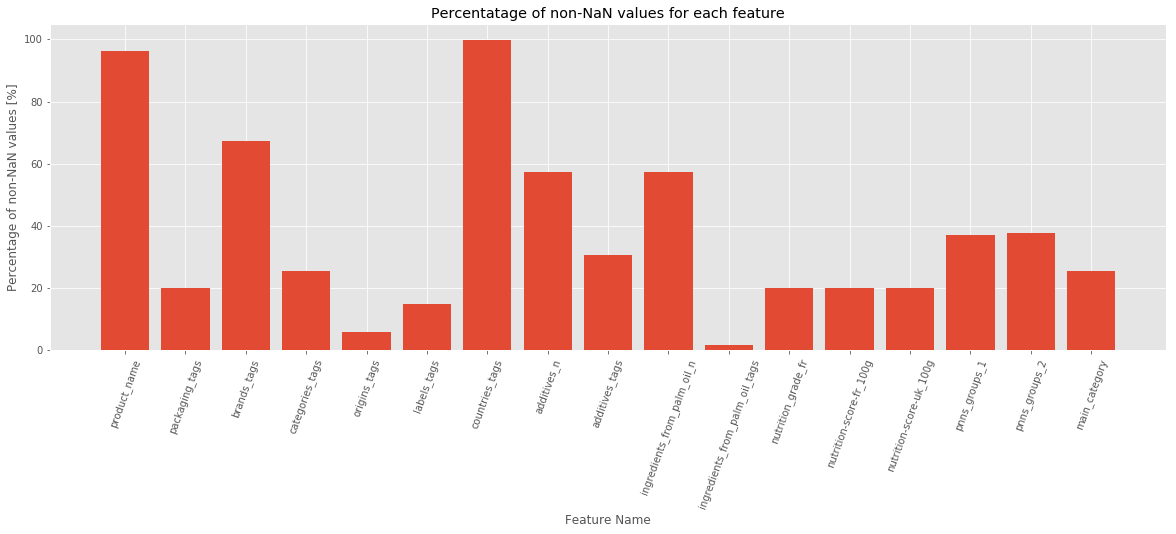

In [55]:
general_info = df3.iloc[:,:17]
plt.figure(figsize=(20,6))
plt.bar(range(general_info.shape[1]),general_info.count()/general_info.shape[0]*100)
plt.xticks(range(general_info.shape[1]), general_info.columns,rotation=70)
plt.title("Percentatage of non-NaN values for each feature")
plt.xlabel("Feature Name")
plt.ylabel("Percentage of non-NaN values [%]")
plt.show()

As expected from looking at the data frame, there are a lot of NaN values. Indeed, for the `origin_tags` there is more than 95% of the values that are NaN values. Which is compromising a lot our research question about import/export. But still, from the `df_unique` dataframe we see that there is still ~50'000 rows that contain an origin tags so we will still be able to do some research on a subset of rows.

We also plot an histogram of the count of non-NaN values for each rows:

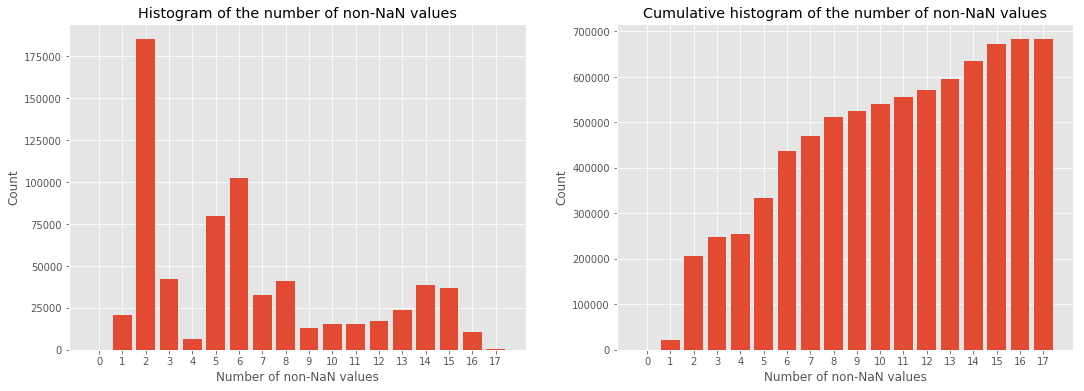

In [87]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(general_info.transpose().count(),
         bins = np.arange(general_info.shape[1]+2)-0.5,
         rwidth = 0.8)
plt.xticks(range(general_info.shape[1]+1))
plt.title("Histogram of the number of non-NaN values")
plt.xlabel("Number of non-NaN values")
plt.ylabel("Count")

plt.subplot(122)
plt.hist(general_info.transpose().count(),
         bins = np.arange(general_info.shape[1]+2)-0.5, 
         cumulative=True,
         rwidth = 0.8)
plt.xticks(range(general_info.shape[1]+1))
plt.title("Cumulative histogram of the number of non-NaN values")
plt.xlabel("Number of non-NaN values")
plt.ylabel("Count")
plt.show()

By seeing the problem row-wise, we can evaluate the amount of data that we will be able to use. We can see the distribution on the left to get a general idea of the number of non-NaN values for each row. But the most interesting plot, is the cumulative on the right. We can see that more than 150'000 rows have more than 9 non-NaN values. So we will still be able to play with a lot of data eventhough we will have to drop loads of rows. We still have to figure out what threshold. Depeding on what specific aspect is studied!

Now we need to plot the percentages of non-NaN values for the nutritional part of the data frame:

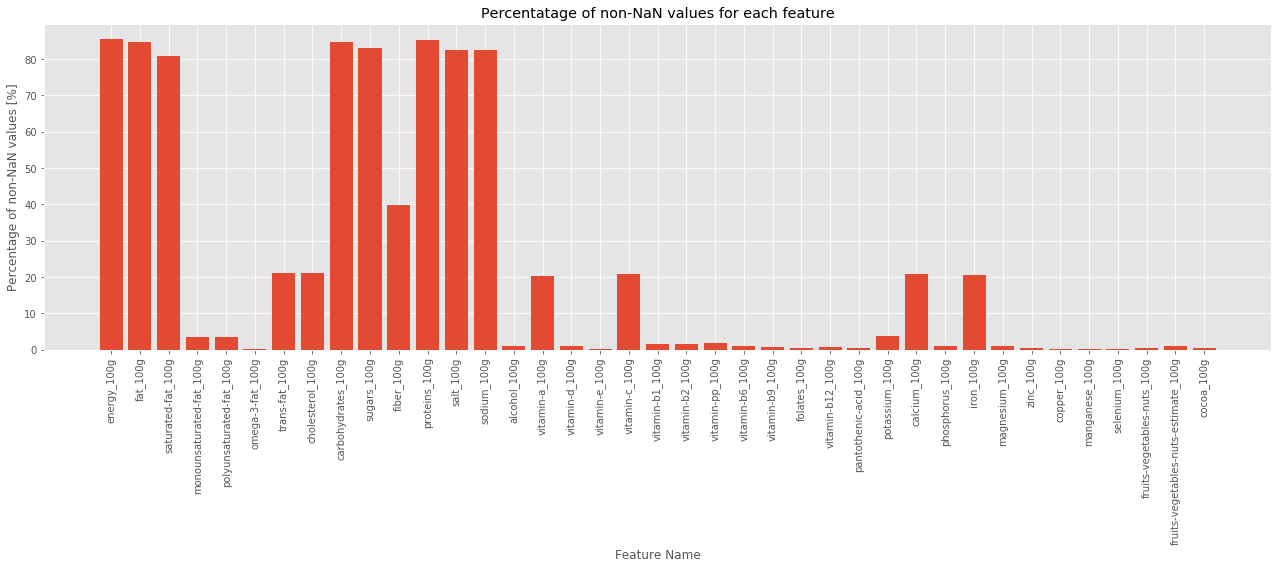

In [83]:
nutritional_info = df3.iloc[:,17:]
plt.figure(figsize=(22,6))
plt.bar(range(nutritional_info.shape[1]),nutritional_info.count()/nutritional_info.shape[0]*100)
plt.xticks(range(nutritional_info.shape[1]), nutritional_info.columns,rotation=90)
plt.title("Percentatage of non-NaN values for each feature")
plt.xlabel("Feature Name")
plt.ylabel("Percentage of non-NaN values [%]")
plt.show()

So for the nutrition values, we clearly have either a very few NaN values (e.g. `energy_100g`, `fat_100g`, `saturated_fat_100g`, etc) or almost only NaN values (e.g. `omega-3_fat_100g`, `monounsaturated-fat_100g`, `polyunsaturated-fat_100g`, etc). But for nutrition data, all the NaN values doesn't necessarily mean that the value is unknown, so once again dependence on the studied case, we will be able to consider some NaN values equal to 0 (or close to 0)!

And we also plot the histograms of the non-NaN values of the nutriments part:

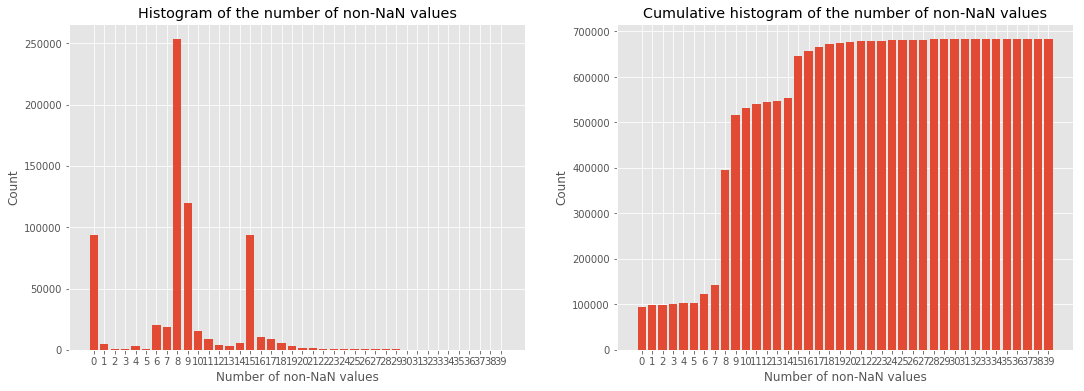

In [86]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(nutritional_info.transpose().count(),
         bins = np.arange(nutritional_info.shape[1]+2)-0.5,
         rwidth = 0.8)
plt.xticks(range(nutritional_info.shape[1]+1))
plt.title("Histogram of the number of non-NaN values")
plt.xlabel("Number of non-NaN values")
plt.ylabel("Count")

plt.subplot(122)
plt.hist(nutritional_info.transpose().count(),
         bins = np.arange(nutritional_info.shape[1]+2)-0.5, 
         cumulative=True,
         rwidth = 0.8)
plt.xticks(range(nutritional_info.shape[1]+1))
plt.title("Cumulative histogram of the number of non-NaN values")
plt.xlabel("Number of non-NaN values")
plt.ylabel("Count")
plt.show()

From thoses histograms, we get that more than 500'000 rows contain at least 7 non-NaN features (which must be one of the 8 most important features that we see above) and ~150000 contain at least 14 non-NaN features which is already a lot.

# Still need to be done
* Try to understand the `nutrition_score_fr_100g` and `nutrition_score_fr_100g` (see: UK Food Standards Administration). What is the scale and how can it be compared to the `nutrition_grade_fr`.
* Try to find out if the question: "What is the proportion of imported/exported products per country?" can still be answered with the lack of origin data (maybe we can try to guess where the origin from the brand or something else) (maybe change the question, where does the food come from?) An other question idea: What distance the food travels on average coutry scale (might need an other small data set with distance between capitals)

# Research questions update
* Drop the carbon footprint idea but keep the labels to make the bio / organic analysis
* Try to find 
* What are the properties of the nutrition grade, food category correaltion?